## Objectives

1. What is Seaborn ?
2. Plotting distributions
3. Catplot
4. Bar plot
5. Scatterplot
5. Relplot

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
penguins = pd.read_csv('penguins_clean.csv')

In [7]:
# inspect the dataset

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [8]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


In [9]:
penguins.describe() # only numerical values

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [10]:
penguins.describe(include='O') # objects

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Using matplotlib, create one visualization of your choice on the dataset

#### Let's make a histogram to see the distribution of body mass of the penguins

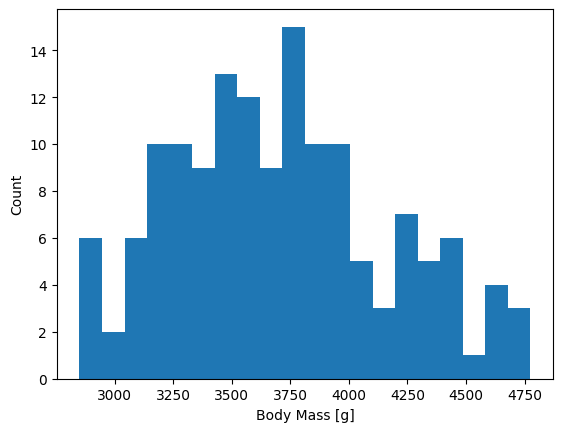

In [11]:
adelie = penguins[penguins['species']== 'Adelie']
plt.hist(x = adelie['body_mass_g'], bins = 20) #bins: divides your data and creates 20 separate bins to give a much granual view
plt.xlabel('Body Mass [g]') # we added x label
plt.ylabel('Count'); #we added y label

### Is there a way to put all the species in one histogram?

In [12]:
# Step 1: filter 3 different dataframes for the individual species.

adelie = penguins[penguins['species']== 'Adelie']
gentoo = penguins[penguins['species']== 'Gentoo']
chinstrap = penguins[penguins['species']== 'Chinstrap']

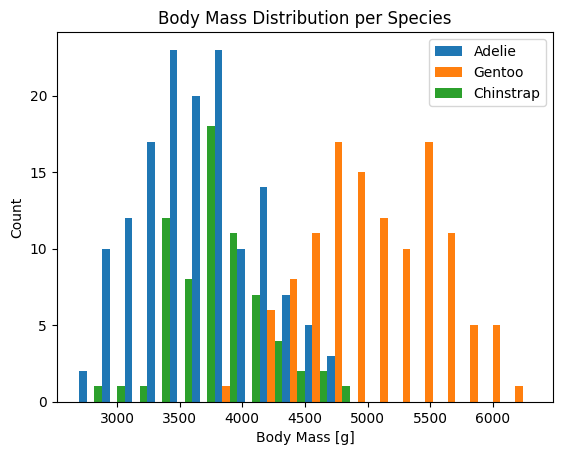

In [13]:
# Step 2: create histograms for all of the species and their body mass in one plot

listofdfs = [adelie['body_mass_g'], gentoo['body_mass_g'], chinstrap['body_mass_g']] 

plt.hist(x = listofdfs, label =['Adelie', 'Gentoo', 'Chinstrap'], bins = 20, rwidth=1)

plt.legend()
plt.xlabel('Body Mass [g]')
plt.ylabel('Count')
plt.title("Body Mass Distribution per Species");

#rwidth: Set Width for Bars in Bar Plot

### Is there an easier way to plot this graph?

## 1. What is Seaborn ?

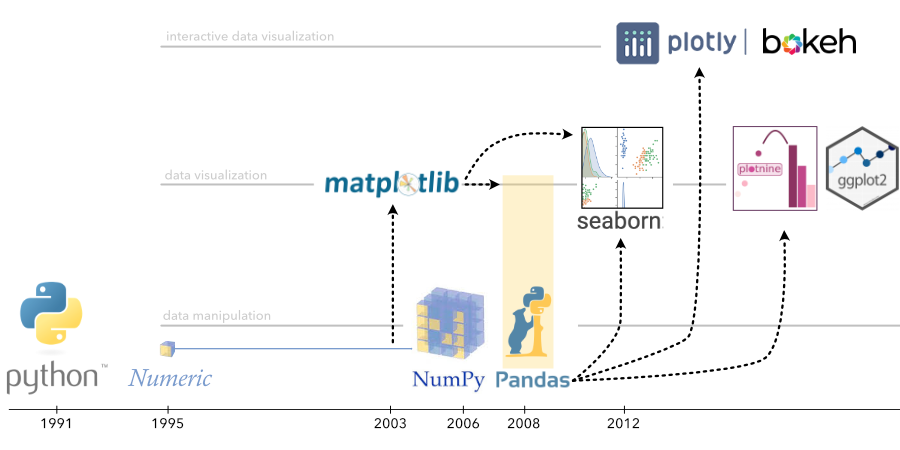

Seaborn is a Python data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics. It was developed by Michael Waskom and is designed to work well with pandas DataFrames, making it easier and more convenient to visualize data directly from these data structures. Seaborn aims to make visualization a central part of exploring and understanding data, with an emphasis on providing more sophisticated analysis and visualizations with less code.


- Seaborn is a python package that provides a high-level interface to Matplotlib

- On Seaborn’s official website, they state: 
> "If Matplotlib 'tries to make easy things easy and hard things possible', seaborn tries to make a well-defined set of hard things easy too"

**Advantages of seaborn include:**

1. Using default themes that are aesthetically pleasing
2. Setting custom color palettes
3. Making attractive statistical plots
4. Easily and flexibly visualizing information from pandas DataFrames

### Seaborn API reference: https://seaborn.pydata.org/api.html

In [18]:
import seaborn as sns

In [19]:
sns.__version__ # let's check the version

'0.12.1'

# 1. Plotting distributions

### Q1: What is the distribution of body mass for different species?

### Histogram

A histogram is a type of bar chart that represents the distribution of numerical data by dividing the data into intervals (also known as bins or buckets) and counting the number of data points that fall into each interval. The intervals are typically specified as consecutive, non-overlapping ranges of values, and the bins are usually of equal size. The vertical axis of a histogram represents the count or frequency of data points within each bin, while the horizontal axis represents the variable being measured.

Histograms are widely used in statistics and data analysis to visually summarize the distribution of a dataset, helping to understand its central tendency, variability, skewness, and the presence of outliers or unusual observations. They provide a quick way to get a sense of the shape of the data distribution, such as whether it is normal (bell-shaped), bimodal (two peaks), skewed (leaning to one side), or uniform (evenly spread).



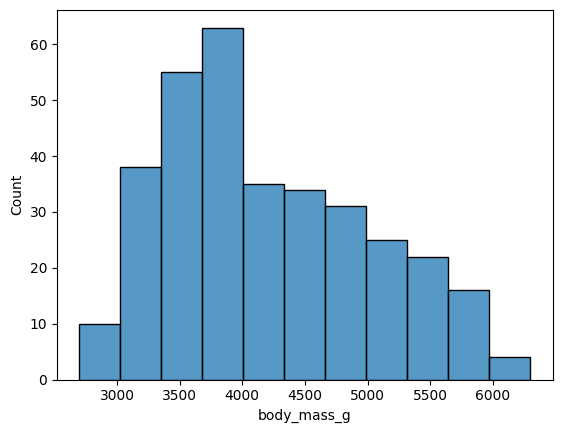

In [20]:
# Let's start with basic
sns.histplot(x = 'body_mass_g',data= penguins); # we pass the dataframe 

# What is the difference btw using matplotlib and seaborn?
# Notice that we do not need to pass labels

Histograms are similar to bar charts but differ primarily in that they are used for continuous data where each bar represents a range of data, while bar charts are used for categorical data with each bar representing a single category.

In data analysis, histograms are useful for:

Identifying different data patterns and their deviations from normal distribution.
Spotting outliers or anomalous data points that fall far outside the overall distribution.
Assessing the symmetry of the data distribution.
Estimating the probability distribution of the underlying dataset.

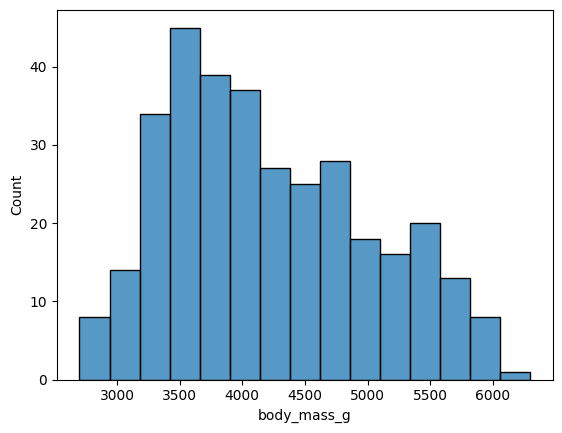

In [26]:
# Let's add the bins parameter
sns.histplot(x = 'body_mass_g', bins = 15, data= penguins);


# you can also pass values as list and define the actual locations bins =[10,30,40]
# extra = it is also possible to use binwidth =10 and binrange =(30,60)

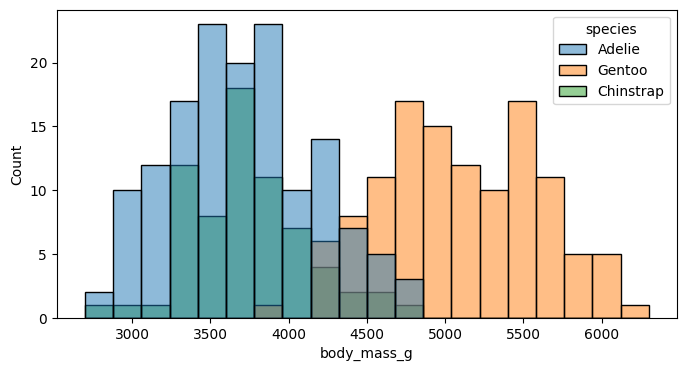

In [25]:
## Let's add all species, for that we are going to use the hue parameter

plt.figure(figsize=(8,4)) # using matplotlib we can change the size of the graph

sns.histplot(x = 'body_mass_g', # hue:shading
             hue = 'species', bins=20, data= penguins);

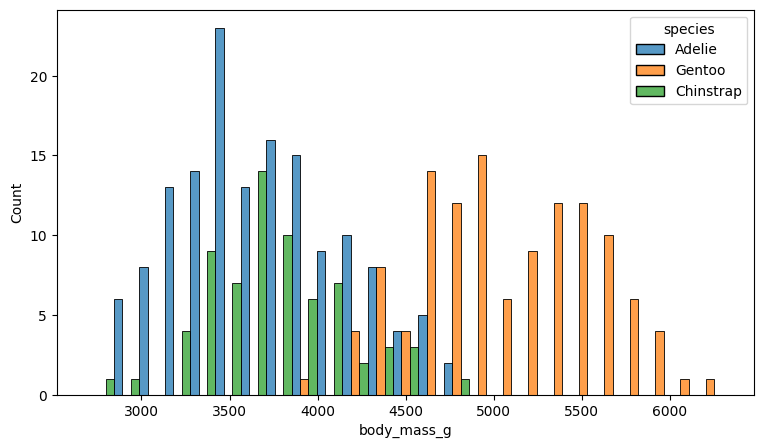

In [24]:
# To see them separately we are adding multiple parameter

plt.figure(figsize=(9,5)) 

sns.histplot(x = 'body_mass_g', 
             hue = 'species',  bins=25, # hue: shading
             multiple="dodge", # options are "layer", "dodge", "stack", "fill"
             #shrink=.7,
            data= penguins);

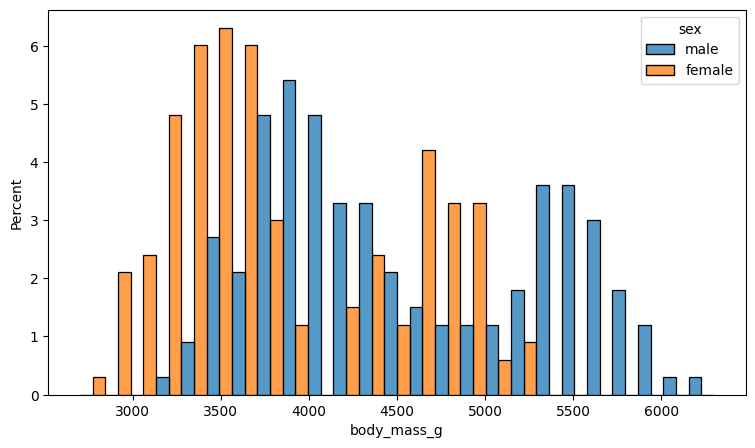

In [27]:
# We see count in y axis. But we can also change it with the stat parameter
plt.figure(figsize=(9,5))
sns.histplot(x = 'body_mass_g', hue = 'sex',  bins=25,
             stat='percent', #all bins heights sum up to 100, we can also use probability or density(area of histogram sumst to one)
             multiple="dodge",
             data= penguins);

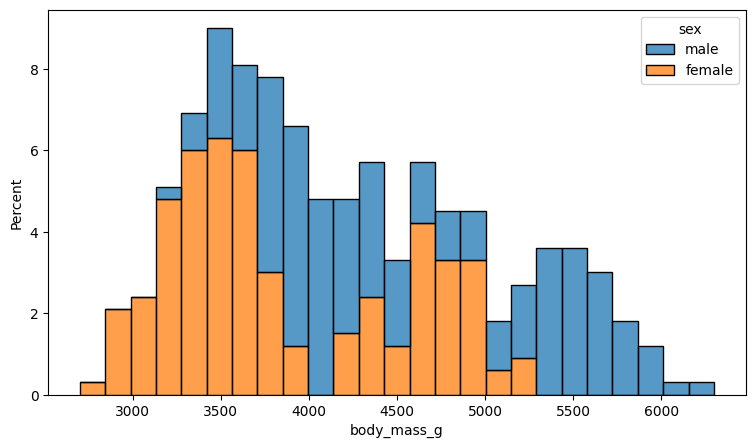

In [28]:
# Let's check the `stacked` option
plt.figure(figsize=(9,5))
sns.histplot(x = 'body_mass_g', hue = 'sex',  bins=25,
             stat='percent',
             multiple="stack",
             data= penguins);

### What is a stacked bar chart and where do we use it?
In a stacked bar chart, each bar is divided into a number of sub-bars stacked end to end. The main objective of a standard bar chart is to compare numeric values between levels of a categorical variable.

### Q2: What is the distribution of body mass for both sexes ?

### Box plots

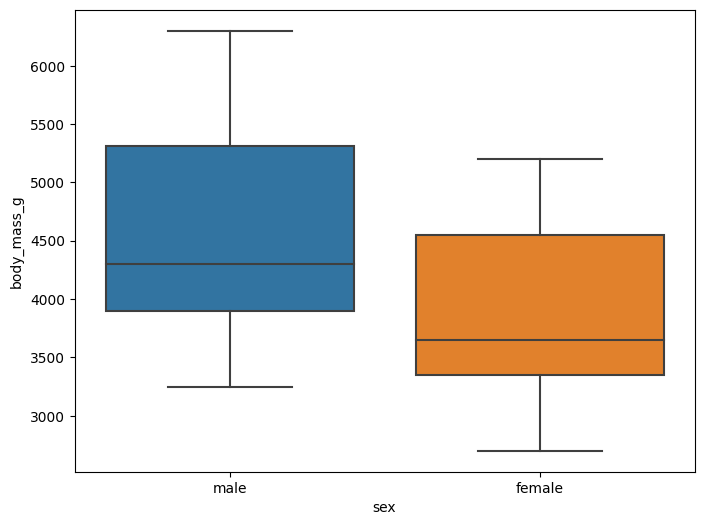

In [29]:
plt.subplots(figsize = (8,6))

sns.boxplot(x = 'sex', y='body_mass_g', data=penguins);

### Recap: What does the box plot show ??

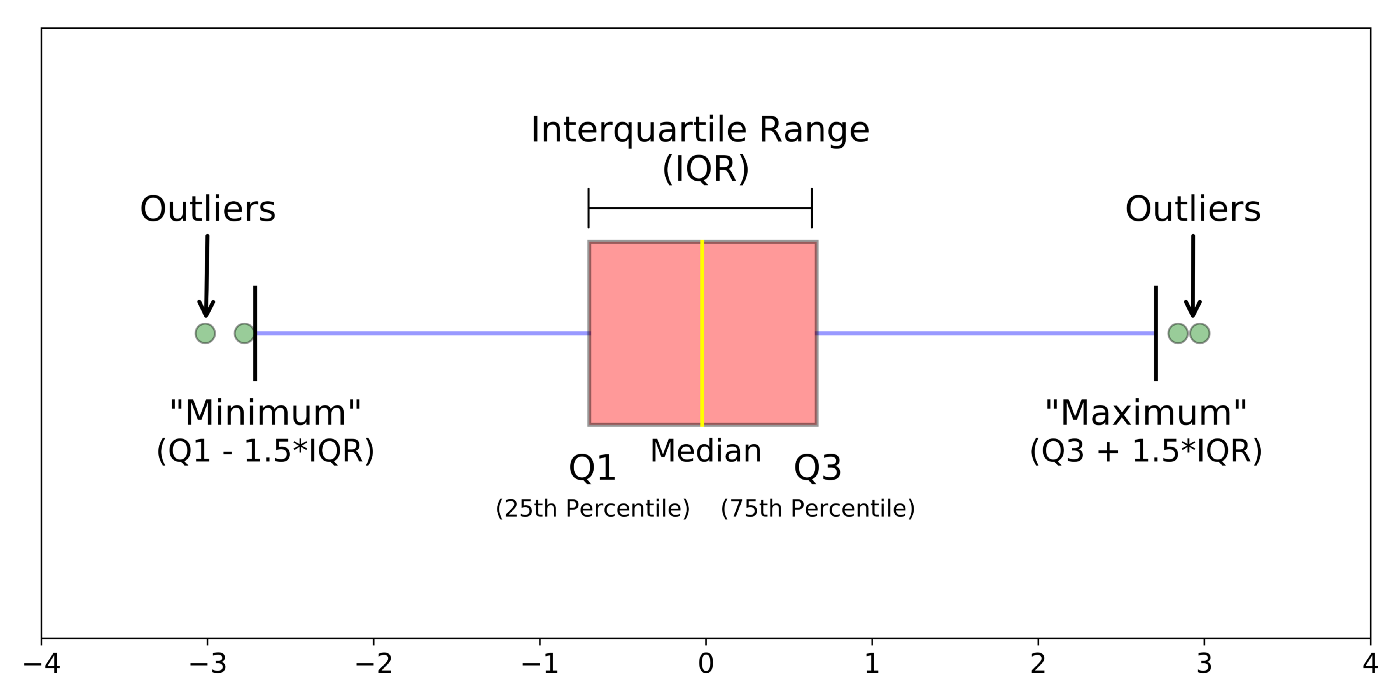

[source](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

### Boxplots are a standardized way of displaying the distribution of data based on a five values summary:

####  <center>( 1. "Minimum", 2. First Quartile, 3. Median, 4. Third Quartile, 5. "Maximum" )</center>

- **Median** (Q2/50th percentile): The middle value of the dataset
- **First Quartile** (Q1/25th percentile): The middle value between the smallest value (not the "Minimum") and the median of the dataset
- **Third Quartile** (Q3/75th percentile): The middle value between the median and the highest value (not the "Maximum") of the dataset
- **Interquartile Range (IQR)**: 25th to the 75th percentile
- **Whiskers** (blue lines)
- **Outliers** (green circles)
- **"Maximum"**: Q3 + 1.5*IQR
- **"Minimum"**: Q1 -1.5*IQR


### Q3: Do Penguins on different islands have different weights ?

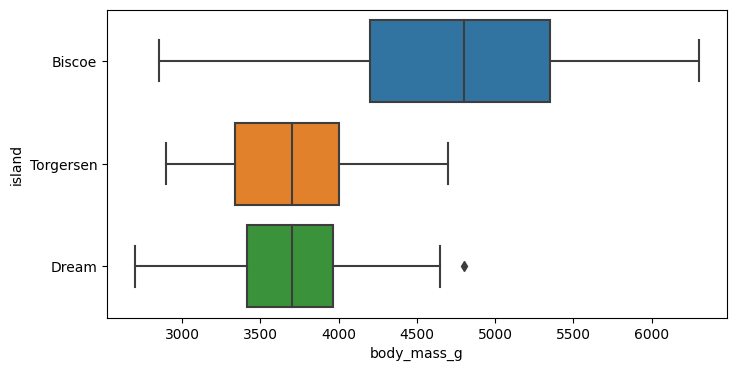

In [30]:
# show body_mass_g per island in a box plot

plt.subplots(figsize = (8,4))

sns.boxplot(y = 'island', x = 'body_mass_g', order = ['Biscoe', 'Torgersen', 'Dream'],
            data=penguins);

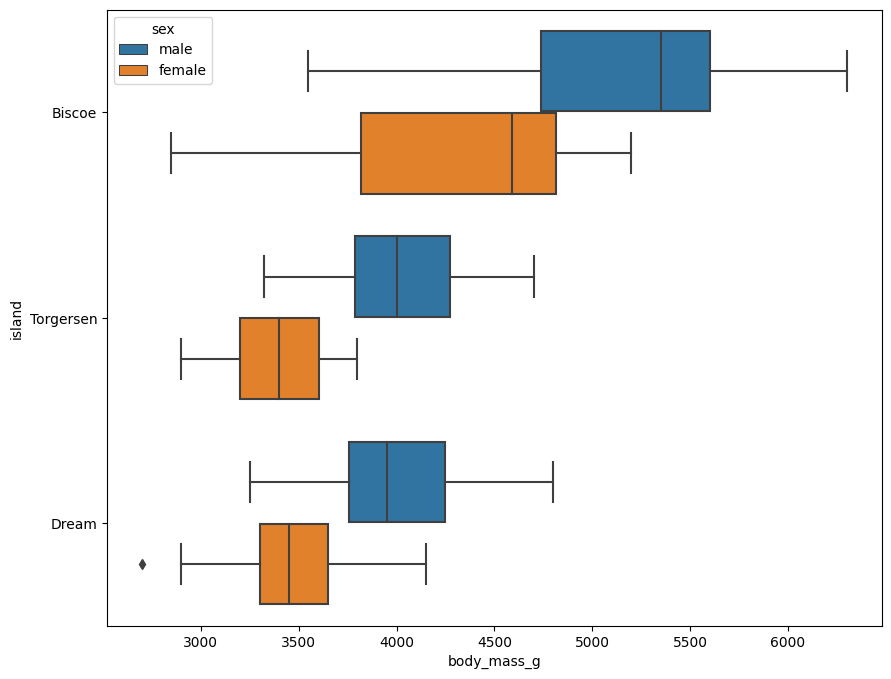

In [31]:
# we can also add sex

plt.subplots(figsize = (10,8))

sns.boxplot(y = 'island', x = 'body_mass_g', 
            order = ['Biscoe', 'Torgersen', 'Dream'],
            hue = 'sex',
            data=penguins
           );

# 3. catplot

Catplot is used for drawing plots for **categorical variables**  
[DOCUMENTATION](https://seaborn.pydata.org/generated/seaborn.catplot.html)

#### The advantages of a catplot:
- has the access to all of seaborn [categorical plots](https://seaborn.pydata.org/api.html#categorical-plots).
- is built on top of the [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid)


> A FacetGrid is a multi-axes grid with subplots visualizing the distribution of variables of a dataset and the relationship between multiple variables.   
>
> Multi-plot grid for plotting conditional relationships.

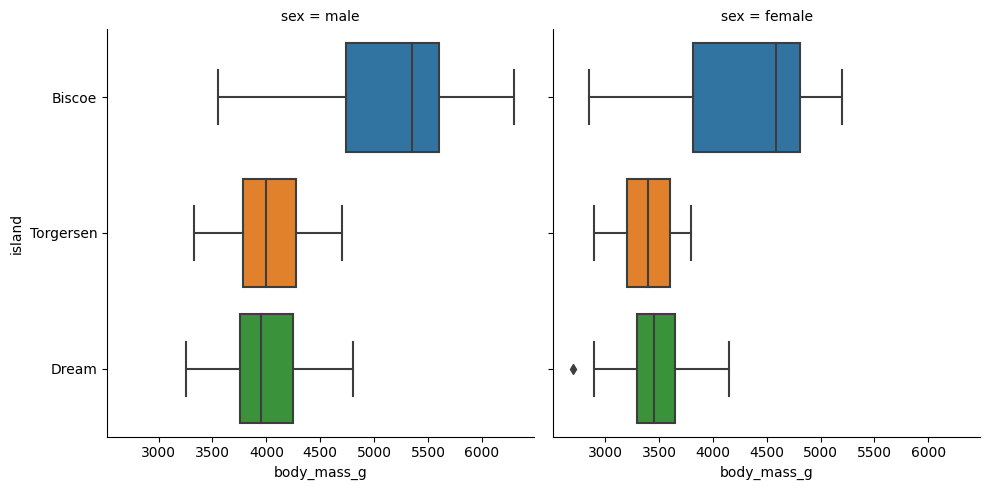

In [32]:
# let's replot the previous example in 2-panels, one for each sex

sns.catplot(x='body_mass_g', y='island', data=penguins, 
            order=['Biscoe', 'Torgersen', 'Dream'], # hue='sex', 
            col='sex', kind='box');
# catplot options are: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”

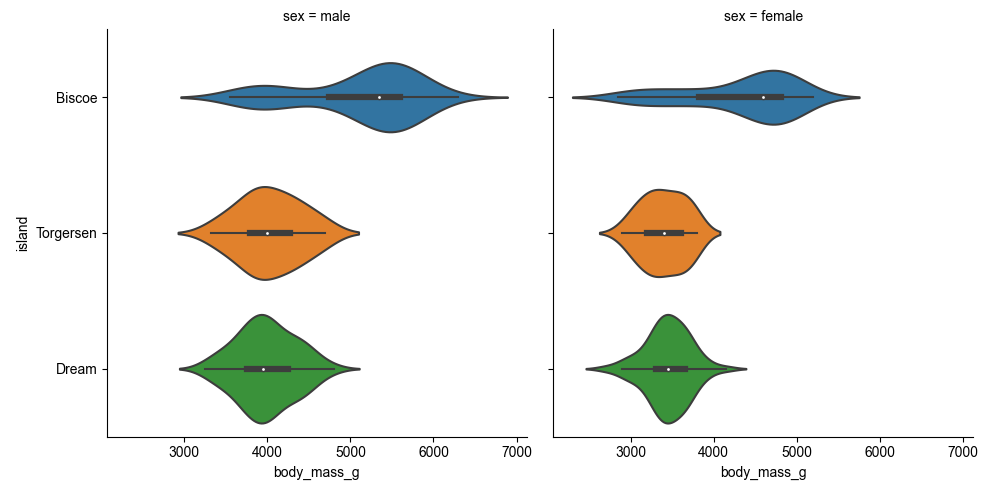

In [33]:
# let's try different kinds

sns.catplot(x='body_mass_g', y='island', data=penguins, 
            order=['Biscoe', 'Torgersen', 'Dream'], # hue='sex', 
            col='sex', kind='violin');

sns.set(font_scale=1);

# catplot options are: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”

### Q4: what is the proportions of each species in the dataset ? Which species live in each island ?

In [34]:
# let's check the values

penguins['species'].value_counts() # normalize=True returns the share values

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

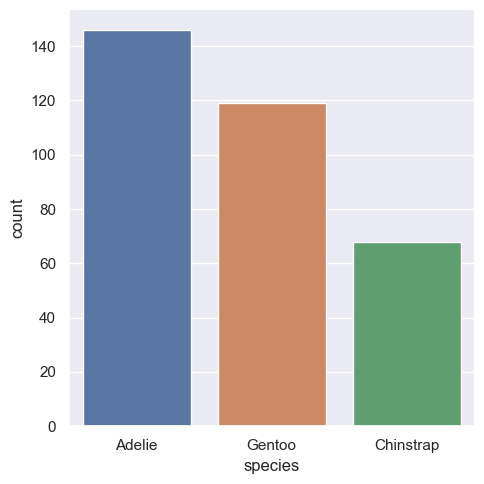

In [35]:
# we can get the count of each species

sns.catplot(x='species', data=penguins, kind='count');

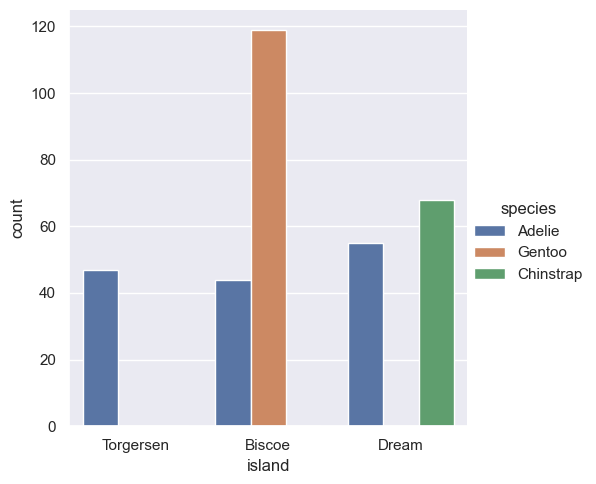

In [36]:
# Which species live in each island ?

sns.catplot(x='island', data=penguins, kind='count', hue='species');

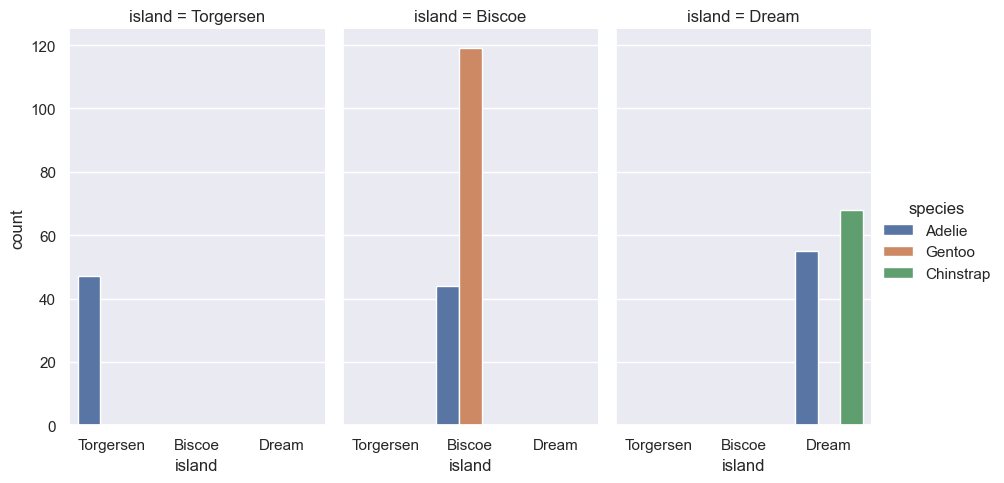

In [37]:
# using the advantages FacetGrid...

sns.catplot(x='island', data=penguins, kind='count',
            hue='species',
            col='island',
            height = 5, aspect = 0.6);    # size

**NOTE:** with FacetGrid you can't use figsize e.g `plt.subplots(figsize = (10,7))` 
- use ``height`` for the height of each facet
- use ``aspect`` for the width/height ratio

# 4. Bar Plot

It plots numeric values for levels of a categorical feature as bars. Each bar represents one categorical value, and the length of each bar corresponds to the bar’s value.

### Q4: Flipper Length for 3 different Penguin Species

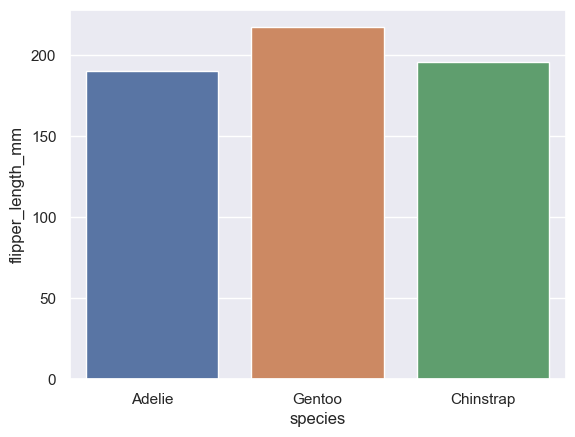

In [41]:
sns.barplot(x ="species", y="flipper_length_mm", errorbar= None, data=penguins);
# try with and without errorbar(which is the confidence interval), 
# give the info we are going to talk about it during the week 4

In [42]:
# By default, the bars are calculated based on the mean of the values.
# You can use another statistic instead of the mean using the estimator parameter. 

In [43]:
adelie = penguins[penguins['species']== 'Adelie']
adelie.describe()

# or we can use group by 
# penguins.groupby('species').body_mass_g'.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,146.000000,146.000000,146.000000,146.000000
mean,38.823973,18.347260,190.102740,3706.164384
std,2.662597,1.219338,6.521825,458.620135
min,32.100000,15.500000,172.000000,2850.000000
25%,36.725000,17.500000,186.000000,3362.500000
50%,38.850000,18.400000,190.000000,3700.000000
75%,40.775000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


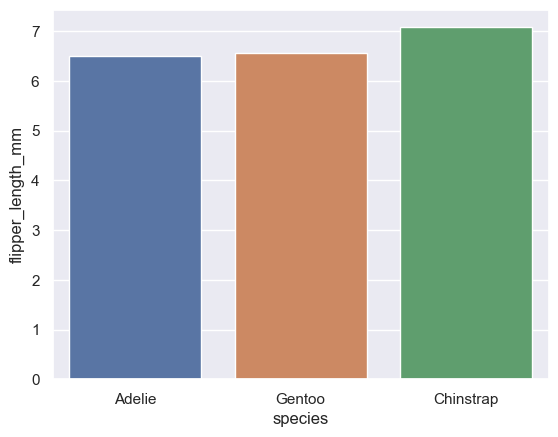

In [45]:
# Let's also try to change the estimator. For that we need to import numpy library
import numpy as np

sns.barplot(x ="species", y="flipper_length_mm", errorbar= None, estimator=np.std, data=penguins);

# estimator=np.max

# 5. Scatterplots

### Q5: What is the relationship between bill lenght and bill depth? Do bigger pinguins have longer flippers ?

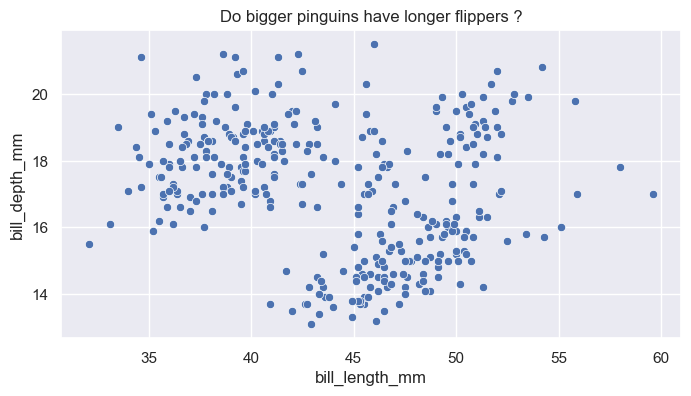

In [46]:
plt.subplots(figsize=(8,4))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguins).set(title='Do bigger pinguins have longer flippers ?');

### Q6: Does the trend between body mass and flipper length hold for both genders ?

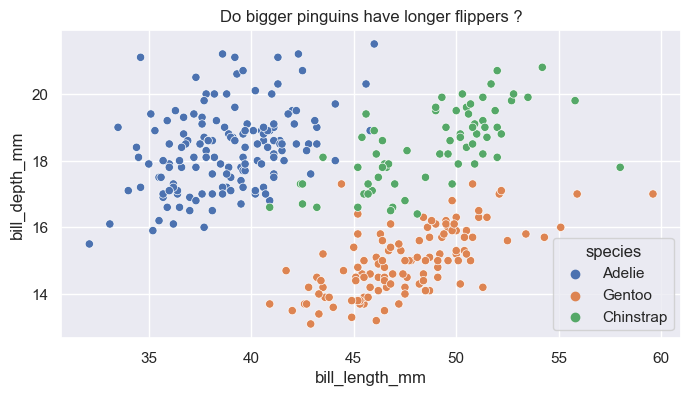

In [47]:
plt.subplots(figsize=(8,4))

sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguins, hue='species'
               ).set(title='Do bigger pinguins have longer flippers ?');

# 6. relplot

relplot is used for drawing plots for **relationship between numeric variables**  
[DOCUMENTATION](https://seaborn.pydata.org/generated/seaborn.relplot.html)

#### The advantages of a relplot:
- has the access to all of seaborn [relational plots](https://seaborn.pydata.org/api.html#relational-api). (though it is just two options: scatterplot and lineplot)
- is built on top of the [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid)

### Q7: What is the relationship between bill length and depth ? Is it the same for all species ?

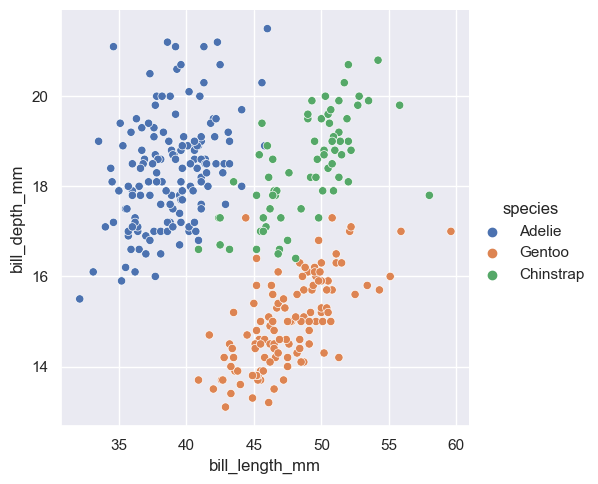

In [49]:
# scatterplot is the default type of the relplot

sns.relplot(x='bill_length_mm', y='bill_depth_mm', 
            kind='scatter', 
            hue='species', data=penguins);
# relplot options are "scatter" or "line"

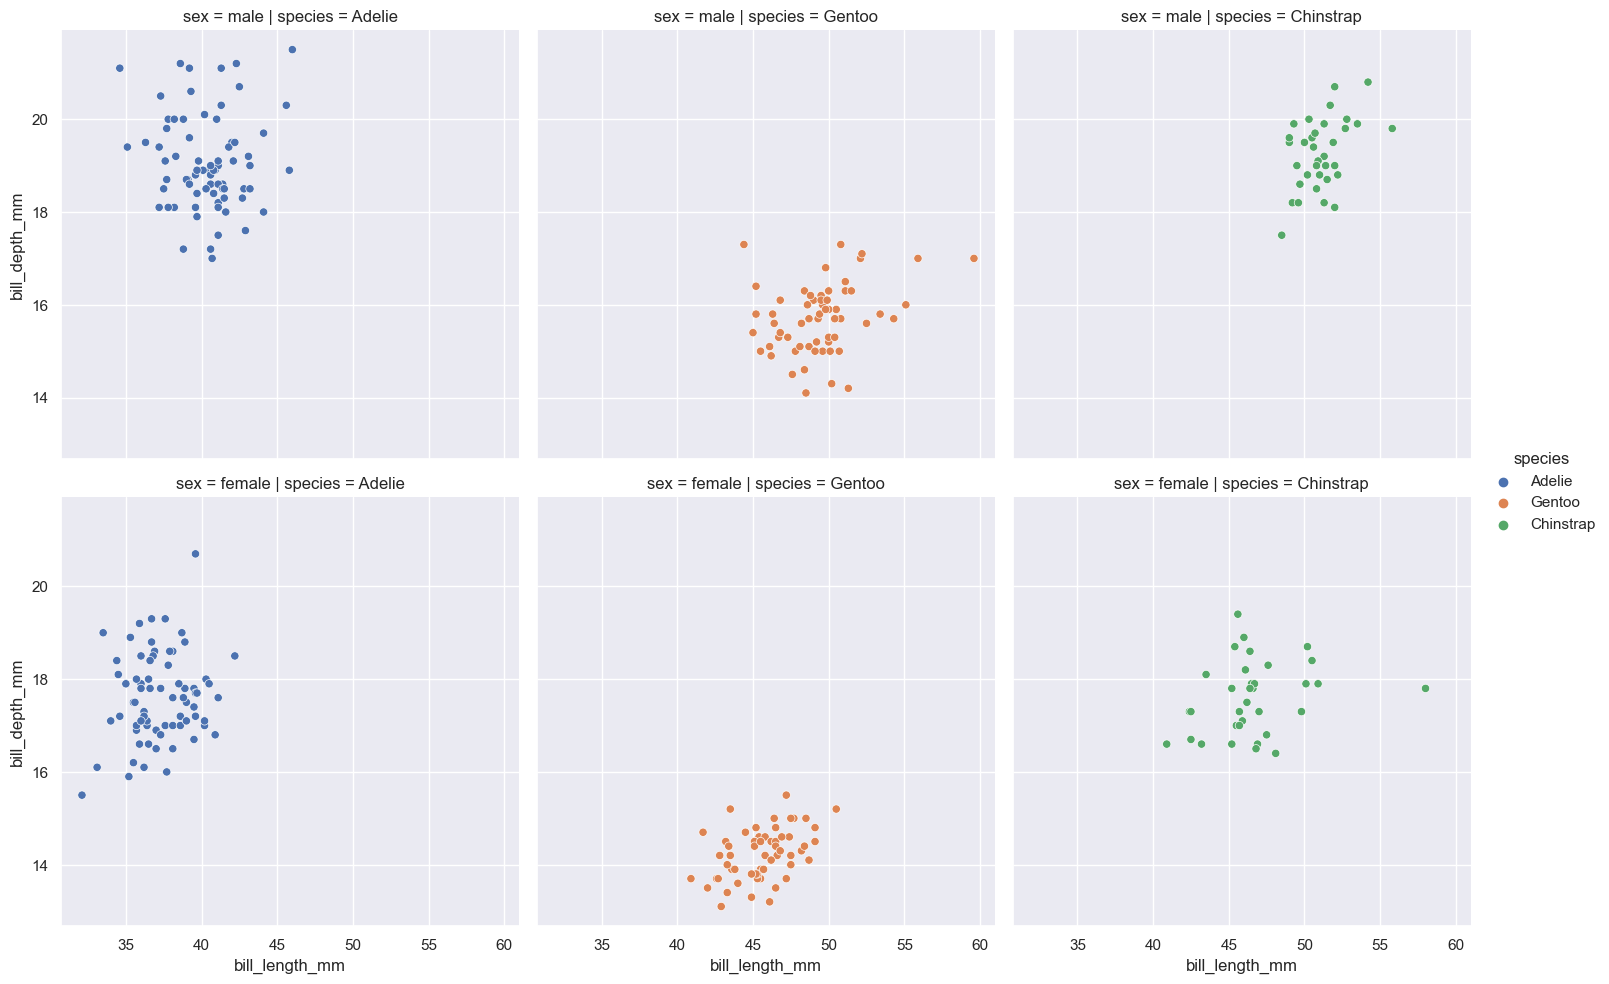

In [50]:
# using the 'col' and 'row' arguments we can split our plot in multiple facets
sns.relplot(x='bill_length_mm', y='bill_depth_mm', kind='scatter', 
            hue='species', 
            col = 'species',
            row = 'sex',
            data=penguins);

# Seaborn's palettes

https://seaborn.pydata.org/tutorial/color_palettes.html

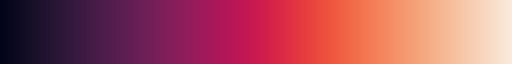

In [51]:
sns.color_palette("rocket", as_cmap=True)

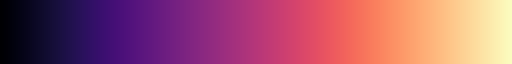

In [52]:
sns.color_palette("magma", as_cmap=True)

another list of all seaborn palettes  
https://www.reddit.com/r/visualization/comments/qc0b36/all_seaborn_color_palettes_together_so_you_dont/